## German Credit künstliches neuronales Netz 

In [ ]:
# Einbinden der benötigten Bibliotheken
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Pfad zur Originaldatei (german.data, nicht numeric)
data_path = 'C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german.data'

In [ ]:
# Einlesen des Datensatzes
df = pd.read_csv(data_path, header=None, sep='\s+')

# Spaltennamen setzen, um den Datensatz besser interpretieren zu können
df.columns = [
    "Status_des_Girokontos", "Dauer_in_Monaten", "Kreditgeschichte", "Kreditverwendungszweck",
    "Kreditbetrag", "Sparkonto_Wertpapiere", "Beschäftigt_seit", "Ratenhöhe",
    "Familienstand_Geschlecht", "Weitere_Bürgen_Schuldner", "Wohnsitzdauer", "Vermögen", "Alter",
    "Andere_Ratenverpflichtungen", "Wohnsituation", "Anzahl_bestehender_Kredite", "Beruf",
    "Unterhaltspflichtige_Personen", "Telefon", "Ausländischer_Arbeiter", "Ziel"
]

# Zielvariable umkodieren: 1 = guter Kredit, 2 = schlechter Kredit
df['Ziel'] = df['Ziel'].map({1: 1, 2: 0})  # Umwandlung in 1 und 0 direkt

# Features & Ziel aufteilen
X = df.drop("Ziel", axis=1)  # Alle Features außer der Ziel-Spalte
y = df["Ziel"]  # Ziel ist die 'Ziel'-Spalte

# Manuelle Trennung numerischer/kategorischer Spalten
numerical_cols = ["Dauer_in_Monaten", "Kreditbetrag", "Ratenhöhe", "Wohnsitzdauer", "Alter", "Anzahl_bestehender_Kredite", "Unterhaltspflichtige_Personen"]
categorical_cols = [col for col in X.columns if col not in numerical_cols]

# ColumnTransformer: Skaliert numerisch, encoded kategorisch
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),  # Numerische Features werden skaliert
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # Kategorische Features werden one-hot encodiert
])


from tensorflow.keras.layers import Dropout
from sklearn.metrics import precision_recall_curve

# Anwenden auf Trainings- und Testdaten
X_processed = preprocessor.fit_transform(X)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Stoppt wenn sich der Validierungs Loss sich 3 Epochen lang nicht verbessert
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modellarchitektur
model = Sequential([
    Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training mit EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=50,  
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Ausgabe nach dem Training
print("Training abgeschlossen.")


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\JonasNiehus\AppData\Local\Temp\ipykernel_17824\2809253724.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data_path, header=None, sep='\s+')
c:\Users\JonasNiehus\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6903 - loss: 0.6317 - val_accuracy: 0.6500 - val_loss: 0.6449
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.6160 - val_accuracy: 0.6500 - val_loss: 0.6361
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7042 - loss: 0.6053 - val_accuracy: 0.6500 - val_loss: 0.6273
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7042 - loss: 0.5958 - val_accuracy: 0.6500 - val_loss: 0.6219
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7056 - loss: 0.5872 - val_accuracy: 0.6500 - val_loss: 0.6181
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7056 - loss: 0.5787 - val_accuracy: 0.6500 - val_loss: 0.6140
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7042 - loss: 0.5715 - val_accuracy: 0.6500 - val_loss: 0.6074
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7042 - loss: 0.5637 - val_accuracy: 0.6625 - val_loss

In [ ]:
# Güteparameter des Modells berechnen
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Vorhersage (Wahrscheinlichkeiten → 0 oder 1)
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Modellgüte berechnen 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred)) 
print("F1-Score:", f1_score(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
📈 Accuracy: 0.765
🎯 Precision: 0.7831325301204819
🔁 Recall: 0.9219858156028369
📊 F1-Score: 0.8469055374592834


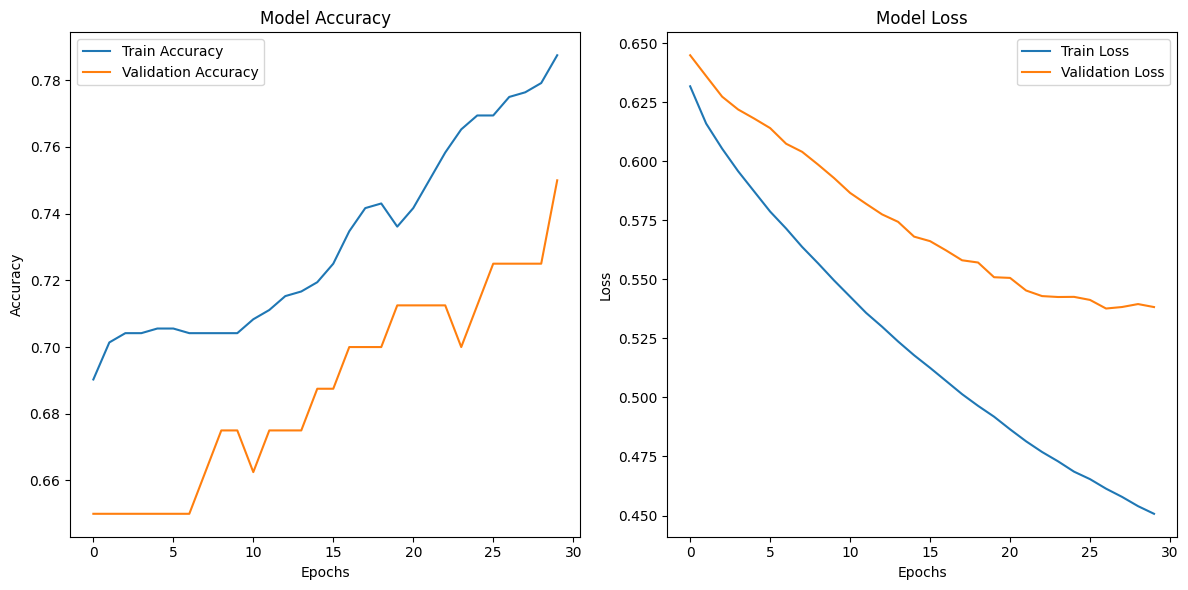

In [9]:
import matplotlib.pyplot as plt

# Trainings- und Validierungsgenauigkeit plotten
plt.figure(figsize=(12, 6))

# Genauigkeit
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Verlust
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Modell + Gewichte speichern
model.save("german_credit_model.keras")

model.save('C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Notebooks/german_credit_model.keras')